In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

In [2]:
features = pd.read_csv('./data/features_dummified_213col.csv', index_col=0)
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=44)

In [4]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = list(features.columns))
X_test = pd.DataFrame(sc.transform (X_test), columns = list(features.columns))

In [5]:
X_train

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
0,0.212118,-0.770712,2.127309,-0.668890,-0.256128,-1.649974,0.128791,-0.576010,0.901635,-0.837512,-0.259728,-1.030673,-0.739193,-1.057208,-0.206985,-0.773432,0.245525,-0.989279,-1.917130,-4.085312,0.306533,-0.504997,-1.280052,0.000444,-0.680458,-1.627588,-1.687579,-0.569147,-1.035562,-0.307231,0.769937,-0.421679,-0.798623,-2.247691,-0.761228,0.759976,-0.348198,-0.098751,-0.286562,-0.061124,0.313119,0.905378,4.64489,-0.047114,-0.091516,-0.33169,-0.492895,-0.223607,-0.094544,-0.206701,-0.136428,-0.193222,-0.265593,-0.023538,-0.216695,-0.074619,-0.148564,0.0,-0.078282,-0.21529,0.0,-0.085149,-0.446322,-0.057735,-

In [6]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [7]:
lm = LinearRegression()
logis = LogisticRegression()
lasso = Lasso(normalize=True)
ridge = Ridge()
enet = ElasticNet()

In [8]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

In [9]:
feat_list = []
j = 0
Xtest_list = []
Xtest_list.append(X_test)
Xtrain_list = []
Xtrain_list.append(X_train)
ls=[]


while j < 212:
    grid = GridSearchCV(Lasso(), params, cv=10)
    results = permutation_importance(Lasso().fit(Xtrain_list[j], Y_train), 
                                     Xtest_list[j], 
                                     Y_test, 
                                     scoring='neg_mean_squared_error')
    # get importance
    sorted_idx = results.importances_mean.argsort()

    feature_rank = {}
    features = np.array(Xtest_list[j].columns.values)
    feat_list.append(features)
    # summarize feature importance
    for i in sorted_idx[::-1]:
        data = {features[i]: results.importances_mean[i]}
        feature_rank.update(data)
    
    last_feat = list(feature_rank)[-1]
    del feature_rank[last_feat]
    ls.append(grid.fit(Xtrain_list[j], Y_train).best_estimator_)
    Xtest_list.append(X_test[list(feature_rank)])
    Xtrain_list.append(X_train[list(feature_rank)])
    
    j = j+1

In [10]:
Xtrain_list[0]

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
0,0.212118,-0.770712,2.127309,-0.668890,-0.256128,-1.649974,0.128791,-0.576010,0.901635,-0.837512,-0.259728,-1.030673,-0.739193,-1.057208,-0.206985,-0.773432,0.245525,-0.989279,-1.917130,-4.085312,0.306533,-0.504997,-1.280052,0.000444,-0.680458,-1.627588,-1.687579,-0.569147,-1.035562,-0.307231,0.769937,-0.421679,-0.798623,-2.247691,-0.761228,0.759976,-0.348198,-0.098751,-0.286562,-0.061124,0.313119,0.905378,4.64489,-0.047114,-0.091516,-0.33169,-0.492895,-0.223607,-0.094544,-0.206701,-0.136428,-0.193222,-0.265593,-0.023538,-0.216695,-0.074619,-0.148564,0.0,-0.078282,-0.21529,0.0,-0.085149,-0.446322,-0.057735,-

In [18]:
df = pd.DataFrame(columns=['R-sq', 'Num_of_feat'])
for i in range(0,212):
    df=df.append({'R-sq':ls[i].score(Xtest_list[i], Y_test), 'Num_of_feat': 212-i}, ignore_index=True)

In [19]:
df

,R-sq,Num_of_feat
0,0.910582,212.0
1,0.911832,211.0
2,0.912116,210.0
3,0.912116,209.0
4,0.91212,208.0
...,...,...
207,0.832927,5.0
208,0.83354,4.0
209,0.809923,3.0
210,0.745628,2.0


In [13]:
df1 = df[df['Num_of_feat']<100]

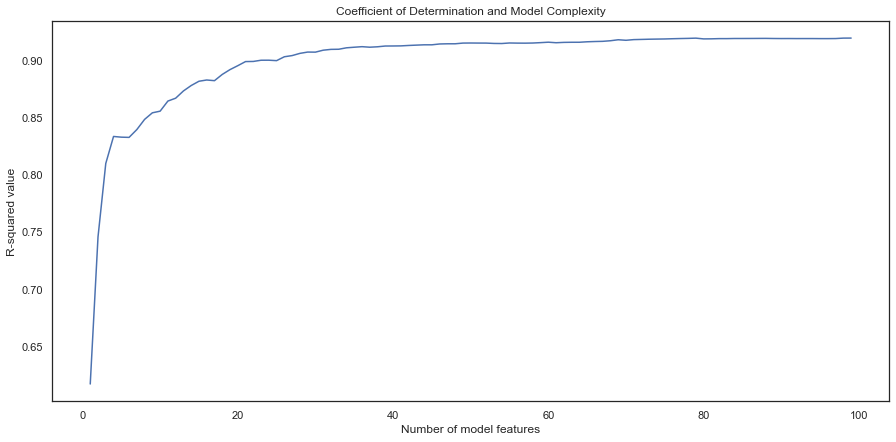

In [14]:
plot1 = sns.lineplot(x=df1['Num_of_feat'], 
                     y=df1['R-sq']).set(
                                    title='Coefficient of Determination and Model Complexity',
                                    xlabel = 'Number of model features',
                                    ylabel = 'R-squared value')

In [15]:
Models = []
Models.append(ls)
Models.append(Xtest_list)
Models.append(Xtrain_list)

import pickle

In [16]:
filename = 'lassomodels.sav'
pickle.dump(Models, open(filename, 'wb'))

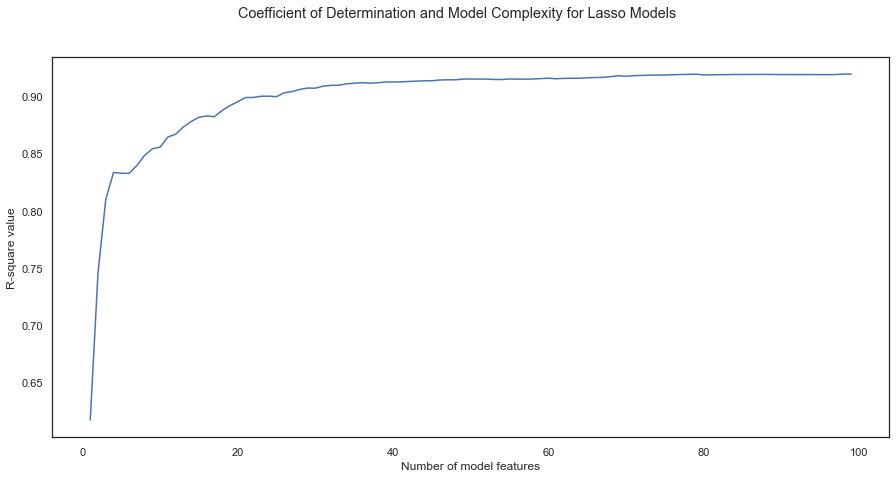

In [17]:
fig = plt.figure()
plt.plot(df1['Num_of_feat'], df1['R-sq'])
fig.suptitle('Coefficient of Determination and Model Complexity for Lasso Models')
plt.xlabel('Number of model features')
plt.ylabel('R-square value')
fig.savefig('lasso_feat_imp.png')